In [23]:
%matplotlib inline
from pathlib import Path

import netCDF4 as nc
import pandas as pd
import xarray as xr

import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts

from parcels import plotTrajectoriesFile

###  Simple, static exploratory plots

'../data/particle_runs'

'NCOM_Particles_from_line.nc'

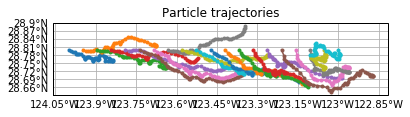

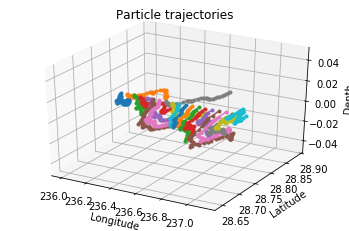

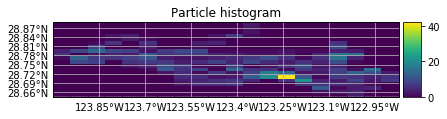

'NCOM_Particles_from_config.nc'

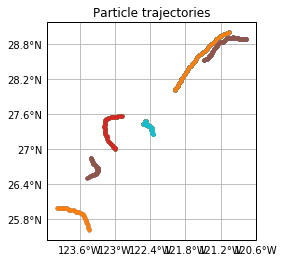

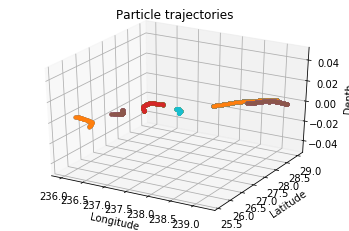

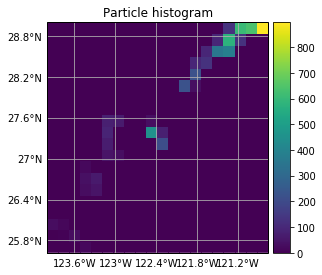

'sample-run_20190206T002153.034610.nc'

/opt/conda/lib/python3.6/site-packages/xarray/coding/times.py:92: RuntimeWarning: invalid value encountered in greater
  only_use_cftime_datetimes=True))


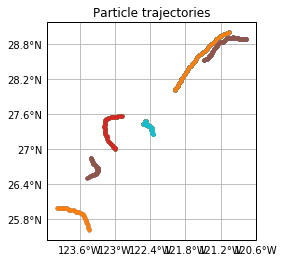

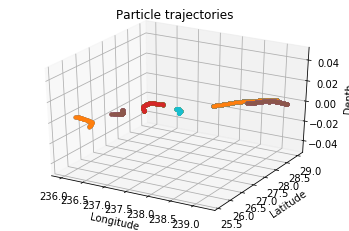

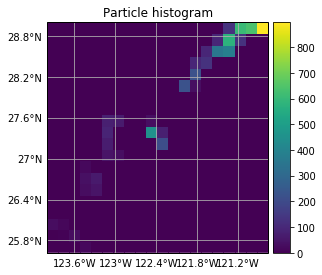

In [31]:
output_files = Path('.') / '..' / 'data' / 'particle_runs'
display(str(output_files))

for g in output_files.glob("*.nc"):
    display(g.name)
    plotTrajectoriesFile(g, mode='2d')
    plotTrajectoriesFile(g, mode='3d')
    plotTrajectoriesFile(g, mode='hist2d')

### Simple animation

In [34]:
plotTrajectoriesFile(g, mode='movie2d_notebook')

/opt/conda/lib/python3.6/site-packages/xarray/coding/times.py:92: RuntimeWarning: invalid value encountered in greater
  only_use_cftime_datetimes=True))
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '10.0', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpd9uf8f9n/temp.m4v']


### Interactive plotting sample

In [ ]:
hv.extension('bokeh')

In [49]:
def load_gv_points(netcdf_file):
    """Given netcdf_filepath return geoview Points object"""
    with nc.Dataset(netcdf_file) as ncd:
        df = pd.DataFrame({'time': ncd.variables['time'][:].flatten(),
                           'lat': ncd.variables['lat'][:].flatten(),
                           'lon': ncd.variables['lon'][:].flatten(),
                           'traj': ncd.variables['trajectory'][:].flatten()
                           })
        particles = gv.Dataset(df, kdims=['time', 'lat', 'lon'])
        points = particles.to(gv.Points, ['lon', 'lat'], ['traj'])
        
        return points

In [50]:
points = load_gv_points('../data/particle_runs/NCOM_Particles_from_config.nc')

In [51]:
(gv.tile_sources.EsriNatGeo * points).opts(opts.Points(global_extent=True, width=500, color='red', height=475, size=12))

:HoloMap   [time]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (traj)

In [52]:
points = load_gv_points('../data/particle_runs/NCOM_Particles_from_line.nc')

In [54]:
(gv.tile_sources.EsriNatGeo * points).opts(opts.Points(global_extent=True, width=500, color='red', height=475, size=5))

:HoloMap   [time]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (traj)